# Statistics- Introduction

### Null Hypothesis

In scientific research, the null hypothesis (often denoted H0) is the claim that no difference or relationship exists between two sets of data or variables being analyzed. The null hypothesis is that any experimentally observed difference is due to *chance alone*, and an underlying causative relationship does not exist, hence the term "null". In addition to the null hypothesis, an alternative hypothesis (often denoted HA or H1) is also developed, which claims that *a relationship does exist between two variables*.

The statement being tested in a test of statistical significance is called the null hypothesis. The test of significance is designed to assess the strength of the evidence against the null hypothesis. Usually, the null hypothesis is a statement of *'no effect' or 'no difference 'H0'*.

##### Statistical significance test:

Take a random sample from the population.

-  If the sample data are consistent with the null hypothesis, then: do not reject the null hypothesis.
-  If the sample data are inconsistent with the null hypothesis, then reject the null hypothesis and conclude that the alternative hypothesis is true.

##### Contingency Table

In statistics, a contingency table is a type of table in a matrix format that displays the (multivariate) frequency distribution of the variables.
Contingency tables classify outcomes for one variable in rows and the other in columns.
The values at the row and column intersections are frequencies for each unique combination of the two variables.

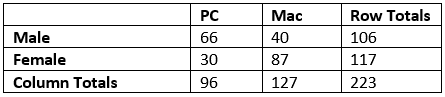

An odds ratio (OR) is a statistic that quantifies the strength of the association between two events, A and B. The odds ratio is defined as the ratio of the odds of A in the presence of B and the odds of A in the absence of B, or equivalently (due to symmetry), the ratio of the odds of B in the presence of A and the odds of B in the absence of A. Two events are independent if and only if the OR equals 1, i.e., the odds of one event are the same in either the presence or absence of the other event. If the OR is greater than 1, then A and B are associated (correlated) in the sense that, compared to the absence of B, the presence of B raises the odds of A, and symmetrically the presence of A raises the odds of B. Conversely, if the OR is less than 1, then A and B are negatively correlated, and the presence of one event reduces the odds of the other event.

The null hypothesis is that the true odds ratio of the populations underlying the observations is one, and the observations were sampled from these populations under a condition: the marginals of the resulting table must equal those of the observed table. The statistic returned is the unconditional maximum likelihood estimate of the odds ratio, and the p-value is the probability under the null hypothesis of obtaining a table at least as extreme as the one that was actually observed. 

#### Setup the necessary prerequisites for the notebook

In [1]:
# set outputs to 3 decimal places
%precision %.3f

'%.3f'

In [2]:
# Download required libraries

# Efficient numerical arrays.
import numpy as np
import itertools
import math
import random

# Data frames.
import pandas as pd

# Alternative statistics package.
import statsmodels.stats.weightstats as stat

# Mains statistics package.
import scipy.stats as ss

# Plotting.
import matplotlib.pyplot as plt

# Fancier plotting.
import seaborn as sns

# Better sized plots.
plt.rcParams['figure.figsize'] = (12, 8)

# Nicer colours and styles for plots.
plt.style.use("ggplot")

#### Fisher Tea Test Background

The Lady Tasting Tea problem was first described by <a href="http://www-history.mcs.st-andrews.ac.uk/Biographies/Fisher.html" style="color: #ff791e">Ronald A. Fisher</a> in his book The Design of Experiments.

<img src="https://www.sciencehistory.org/sites/default/files/styles/rte_full_width/public/rte/fisher_as_young_man.jpg" style="border: 1px solid #ff791e" width="200px">

[Fisher Tea Test Background](https://www.sciencehistory.org/distillations/ronald-fisher-a-bad-cup-of-tea-and-the-birth-of-modern-statistics "Ronald Fisher, a Bad Cup of Tea, and the Birth of Modern Statistics") <br>


Fisher described the tea tasting problem as follows.

> A lady declares that by tasting a cup of tea made with milk she can discriminate whether the milk or the tea infusion was first added to the cup: We will consider the problem of designing an experiment by means of which this assertion can be tested. For this purpose let us first lay down a simple form of experiment with a view to studying its limitations and its characteristics, both those which appear to be essential to the experimental method, when well developed, and those which are not essential but auxiliary.

> Our experiment consists in mixing eight cups of tea, four in one way and four in the other, and presenting them to the subject for judgment in a random order. The subject has been told in advance of what the test will consist, namely that she will be asked to taste eight cups, that these shall be four of each kind, and that they shall be presented to her in a random order, that is in an order not determined arbitrarily by human choice, but by the actual manipulation of the physical apparatus used in games of chance, cards, dice, roulettes, etc., or, more expeditiously, from a published collection of random sampling numbers purporting to give the actual results of such manipulation. Her task is to divide the 8 cups into two sets of 4, agreeing, if possible, with the treatments received.

> In the book, Fisher describes the *null hypothesis*. <u>It is the statement to be countered by the experiment.</u>  
In this case it is the hypothesis that the subject cannot tell the difference between a cup of tea that had milk in it first and one that had the tea in it first.  
<br>
**Null Hypothesis:** <u>the subject can not tell if the cup had milk in it first or last.</u>  
Once we collect the experimental data we evaluate how likely we were to see such data if the null hypothesis is true. If it is very unlikely, then we may reject the null hypothesis. Typically we have an alternative hypothesis that we suggest rejecting the null hypothesis is evidence for.  
<br>
**Alternative Hypothesis:** <u>the subject can tell.</u>
<br>Should the subject pick the correct four cups with milk in them first, there is only a 1 in 70 (~1.4%) chance of them having done that if they were simply guessing. Fisher considered that unlikely enough to reject the null hypothesis if they manage it.

The concept of a null hypothesis is used differently in two approaches to statistical inference. In the significance testing approach of Ronald Fisher, a null hypothesis is rejected if the observed data are significantly unlikely to have occurred if the null hypothesis were true: *the number of cups that were correctly chosen is by chance alone*.  
In this case, the null hypothesis is rejected and an alternative hypothesis is accepted in its place: *the number of cups that were correctly chosen is more than predicted by chance alone*.  <br> <br>In summary: The hypothesis that chance alone is responsible for the results of the experiment is called the null hypothesis. 

Let us investigate the number of ways in which the lady can arrange the eight cups into two groups of four.
- The first group is the cups with milk first.
- The second group is the cups with tea first.
- Once we select four cups for the first group, the second group is made up of the remaining cups.
- So, we only really need to count how many different ways there are to select four cups from eight.
- To begin we give each of the eight cups a label from 0 to 7.
- Note that the cups have no order in the experiment, we are labelling them with integers simply for convenience.

In [3]:
# Python code for the eight cups.
cups = list(range(8))
cups

[0, 1, 2, 3, 4, 5, 6, 7]

- We can assume the subject is trying to pick the four cups with milk in first.<br>
- If the subject is picking the cups randomly then they are randomly picking one of seventy different options.<br>
- By randomly, we mean that they can not really tell which cups have the milk in first.<br>
- Therefore they have only a probability of 1/70 of getting the right answer.

The number of ways of selecting four things from eight where the order doesnt matter  
**(8*7*6*5)/(4*3*2*1)**

8 cups randomly labelled: 0 1 2 3 4 5 6 7.  
4 spots:  _ _ _ _.  Select the 1st cup with tea in them.  
For example say 1st cup chosen is 2, then 0, then 7 then 5. 
1st 4 spots: 2 0 7 5.  
1st spot have 8 selection possibilities.  
Thereafter 2nd spot have 7 selection possibilities.  
3rd spot: have 6 selection possibilities.  
4th spot: have 5 selection possibilities and so on.
Therefore there are (8x7x6x5) ways to choose/possibilities.  
The order within group is not important.  Just that the cup is in the right group.  
i.e.  i.e. 2-0-7-5 same as 0-2-7-5 (these are in the 4 cups of Group 1 (tea first)).  
Therefore we have to take in to account how many times have we double counted the same combination.      
We now need to remove the potential duplicates. Dividing (8x7x6x5) by(4x3x2x1) does this.  
This results in 70 possibilities to select the cups at random.
Just one of these will get the 4 right cups in Group 1.  
It works out that there is a 1/70 chance or 1.4% the taster will get the 4 'correct' cups right by chance.  

#### Itertools
Itertools is a package in python that returns the *distict number* of ways of selecting *n* unordered items from a list of elements/numbers *n*.  


In [4]:
# use of itertools function from python. 
# Itertools returns the number of distinct Returns 70 rows (70 combinations) for 8 cups declared above
# Note 1:  index goes from 0-7
# Note 2: Itertools starts below with 0,1,2,3 but this is simply the computer way of displaying a list of integers.  
# If this is removed there is no reason to start with 0,1,2,3.etc
poss = list(itertools.combinations(cups, 4))
poss[0:10]
# poss[0:70] returns all combinations

[(0, 1, 2, 3),
 (0, 1, 2, 4),
 (0, 1, 2, 5),
 (0, 1, 2, 6),
 (0, 1, 2, 7),
 (0, 1, 3, 4),
 (0, 1, 3, 5),
 (0, 1, 3, 6),
 (0, 1, 3, 7),
 (0, 1, 4, 5)]

In [5]:
# Only one of the 70 randomly selected possibilities is the desired result.
# i.e. the cups chosen are the correct 4 cups (milk first or tea first)
# Thus 1 in 70 chance or:
1/70

0.014

We have seen above that with 8 cups of tea the probability of randomly selecting the correct cups is equal to 0.014 or **1.4%**.  
We can use the maths library from python to try to find the minimum number of cups of tea required to ensure the probability of randomly selecting the correct cups is less than or equal to **1%**.

Similar to itertools we can do this with the help of Python Maths libraries

In [6]:
# number of ways of selecting 4 cups from 8 (number of choices)
math.comb(8,4)

70

In [7]:
# probability of selecting 4 cups from 8 is 1/(number of choices)
1.0/math.comb(8,4)

0.014

In [8]:
# probability of selecting 4 cups from 8 - as a percentage
1.0/math.comb(8,4)*100

1.429

i.e. for the tea experiment with 8 cups - 4 tea first, 4 milk first the probability of selecting a given combination is approx 1.5%  as was quoted above

# Statisitics Exercises

<h3 style="color: #001a79;">Exercise 1</h3>

<hr style="border-top: 1px solid #001a79;" />

#### Calculate the minimum number of cups of tea required to ensure the probability of randomly selecting the correct cups is less than or equal to 1%.


In [9]:
# Number of combinations from selecting correct 5 cups from 10 is:
math.comb(10,5)

252

In [10]:
# Probability of randonly selecting correct 5 cups from 10 is:
1.0/math.comb(10,5)

0.004

In [11]:
# Probability as a percentage:
1.0/math.comb(10,5)*100

0.397

So if the experiment was done with 10 cups total, five with milk in first and five with tea in first, <br> then the chance of selecting correctly randomly is **much** less than 1%.<br>
Lets try 9 cups.

In [12]:
# number of ways of selecting 4 cups from 9
math.comb (9,5)

126

In [13]:
# Probability of randonly selecting correct 4 (or 5) cups from 9 -as a percentage is:
1.0/math.comb(9,4)*100

0.794

##### Thus choosing 4 cups with milk first from 10 cups the chances of correct selections based on random selection is 0.004 or circa **0.4%**

##### Choosing 4 cups with milk first from 9 cups the chances of correct selections based on random selection is 0.00794 or circa **0.8%**.

#### Answer is 9 cups.

<br>

#### *Bonus:* How many would be required if you were to let the taster get one cup wrong while maintaining the 1% threshold?

First lets re-look at the original experiment from above:

In [14]:
# number of ways of selecting 3 cups from 8 (number of choices)
math.comb(8,3)

56

In [15]:
# probability of selecting 3 cups from 8 is 1/(number of choices)
1.0/math.comb(8,3)

0.018

In [16]:
# probability of selecting 3 cups from 8 - as a percentage
1.0/math.comb(8,3)*100

1.786

##### Thus the probability of selecting 3 correct from the 8 cups is >1%.  We need to add more 'random' cups.  Lets look at using a set of 9 cups.

In [17]:
# number of ways of selecting 3 cups from 9 (number of choices)
math.comb(9,3)

84

In [18]:
# probability of selecting 3 cups from 9 is 1/(number of choices)
1.0/math.comb(9,3)

0.012

In [19]:
# probability of selecting 3 cups from 9 - as a percentage
1.0/math.comb(9,3)*100

1.190

##### Thus the probability of selecting 3 correct from the 9 cups is still >1%.  We need to add more 'random' cups.  Lets look at using a set of 10 cups.

In [20]:
# number of ways of selecting 3 cups from 10 (number of choices)
math.comb(10,3)

120

In [21]:
# probability of selecting 3 cups from 9 is 1/(number of choices)
1.0/math.comb(10,3)

0.008

In [22]:
# probability of selecting 3 cups from 9 - as a percentage
1.0/math.comb(10,3)*100

0.833

### Thus 10 cups would be required if we were to let the taster get one cup wrong while maintaining the 1% threshold? 
<br>


<h3 style="color: #001a79;">Exercise 2</h3>

<hr style="border-top: 1px solid #001a79;" />

<i style="color: #001a79;">Remember to do these exercises in your own notebook in your assessment repository.</i>

Use <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html" style="color: #ff791e">scipy's version of Fisher's exact test</a> to simulate the Lady Tasting Tea problem.

Perform a Fisher exact test on a 2x2 contingency table.

In [23]:
# from scipy.stats import fisher_exact as f

Review the scipy stats page 

Understand the concept

Apply to fisher tea test

Note: Fisher tea test was 4-4  wheresas scipy used 2-2

Examine the code to see where 2-2 is used: can this be extended

can click on the [source] button and remove some of mystique <br>
it hyperlinks to github <br>
scipy is the name of the repository <br>
asks to go to line 4492.  The scipystats_fisher function (code) is here <br>
This is what is used i.e. code pulled out of comments from a repository in github <br> scipy_stats text is pulled from here <br>from line 4661 actually have the python code that executes the function <br>  e.g. 'return oddsratio, pvalue' line 4723 is the output of the python code <br>
ultimately its just open source python code <br>

In [24]:
## Statistical Methods

In [25]:
# statistical using fisher exact get to similar output as itertools methods
import scipy.stats as ss

In [26]:
# use this figure it out
# in scipy stats if scroll down you will get loads of examples of how to do things
ss.fisher_exact

<function scipy.stats.stats.fisher_exact(table, alternative='two-sided')>

In [27]:
# using fisher exact get to similar output as itertools

In [28]:
# example
ss.fisher_exact([[4,0], [0,4]])
# should have been 0.014285

(inf, 0.028571428571428536)

In [29]:
# turns out its double the chance
# use scipy stats.fisher_exact to get the right result
# but its giving the probability * 2
# whats going on
# go down to the code
# use it to get the exepcted value
# go back and understand why the statisitical code is giving the correct value- make sense of it 
# see if anything you can change in use of function without understanding the fisher-exact test
# get comfortable with scipy.stats
# reverse engineer scipy.stats to get the value you want
# treat like learning how to drive the car
# google lady tasting tea -scipy stats

0.014285*2

0.029

<h3 style="color: #001a79;">Exercise 3</h3>

<hr style="border-top: 1px solid #001a79;" />

<i style="color: #001a79;">Remember to do these exercises in your own notebook in your assessment repository.</i>

Take the code from the <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html" style="color: #ff791e">Examples section of the scipy stats documentation for independent samples t-tests</a>, add it to your own notebook and add explain how it works using MarkDown cells and code comments. Improve it in any way you think it could be improved.

This test assumes that the populations have identical variances by default i.e. 'equal_var=True'

If True (default), perform a standard independent 2 sample test that assumes equal population variances. <br>

If False, perform Welch’s t-test, which does not assume equal population variance

In [30]:
from scipy import stats
# rng = random number generator
rng = np.random.default_rng()

Test with sample with identical means:

In [31]:
rvs1 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
rvs2 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
stats.ttest_ind(rvs1, rvs2)
# Output varies when re-run- rng?
# which above parameters will reduce the output variability when run and why?

Ttest_indResult(statistic=-1.3437608051363443, pvalue=0.17933116893863693)

In [32]:
# Added parameter (equal_var=False) to function
# Only slight difference in output from above??
stats.ttest_ind(rvs1, rvs2, equal_var=False)
# Output linked to cell output above- 'rng' above generates the n random numbers

Ttest_indResult(statistic=-1.3437608051363443, pvalue=0.17933616796688576)

ttest_ind underestimates p for unequal variances:

In [33]:
# create a new set of values
rvs3 = stats.norm.rvs(loc=5, scale=20, size=500, random_state=rng)
stats.ttest_ind(rvs1, rvs3)

Ttest_indResult(statistic=-1.3099334392977318, pvalue=0.19051978910296605)

In [34]:
# Added parameter (equal_var=False) to function
# Only slight difference in output from above??
stats.ttest_ind(rvs1, rvs3, equal_var=False)

Ttest_indResult(statistic=-1.3099334392977318, pvalue=0.19062760086995448)

When n1 != n2, the equal variance t-statistic is no longer equal to the unequal variance t-statistic:

In [35]:
rvs5 = stats.norm.rvs(loc=8, scale=20, size=100, random_state=rng)
stats.ttest_ind(rvs1, rvs5)
# Ttest_indResult(statistic=-2.8415950600298774, pvalue=0.0046418707568707885)
stats.ttest_ind(rvs1, rvs5, equal_var=False)
# Ttest_indResult(statistic=-1.8686598649188084, pvalue=0.06434714193919686)

Ttest_indResult(statistic=-0.8867753754760211, pvalue=0.377149515913486)

When performing a permutation test, more permutations typically yields more accurate results. Use a np.random.Generator to ensure reproducibility:



In [36]:
# stats.ttest_ind(rvs1, rvs5, permutations=10000,random_state=rng)
# Ttest_indResult(statistic=-2.8415950600298774, pvalue=0.0052994700529947)

Take these two samples, one of which has an extreme tail.

In [37]:
a = (56, 128.6, 12, 123.8, 64.34, 78, 763.3)
b = (1.1, 2.9, 4.2)

Use the trim keyword to perform a trimmed (Yuen) t-test. For example, using 20% trimming, trim=.2, the test will reduce the impact of one (np.floor(trim*len(a))) element from each tail of sample a. It will have no effect on sample b because np.floor(trim*len(b)) is 0.

In [38]:
# stats.ttest_ind(a, b, trim=.2)
# Ttest_indResult(statistic=3.4463884028073513,pvalue=0.01369338726499547)

Why trim?: Trimmed means are robust estimators of central tendency. To compute a trimmed mean, we remove a predetermined amount of observations on each side of a distribution, and average the remaining observations. If you think you’re not familiar with trimmed means, you already know one famous member of this family: the median. Indeed, the median is an extreme trimmed mean, in which all observations are removed except one or two.

Using trimmed means confers two advantages:

Trimmed means provide a better estimation of the location of the bulk of the observations than the mean when sampling from asymmetric distributions;
the standard error of the trimmed mean is less affected by outliers and asymmetry than the mean, so that tests using trimmed means can have more power than tests using the mean.
Important point: if we use a trimmed mean in an inferential test (see below), we make inferences about the population trimmed mean, not the population mean. The same is true for the median or any other measure of central tendency. So each robust estimator is a tool to answer a specific question, and this is why different estimators can return different answers.

To trim a datset it is first sorted and then a predetermined percentage at either end of the dataset are removed.

##### References
<br>
Ronald Fisher, a Bad Cup of Tea, and the Birth of Modern Statistics:  <br>
https://www.sciencehistory.org/distillations/ronald-fisher-a-bad-cup-of-tea-and-the-birth-of-modern-statistics <br><br>
Basic Statistics- Trimmed Means <br>https://garstats.wordpress.com/2017/11/28/trimmed-means/

## End of Exercises

<h1 style="color: rgb(0, 91, 94);">Statistics</h1>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />


<h2 style="color: rgb(0, 91, 94);">Lady Tasting Tea</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

<img src="https://upload.wikimedia.org/wikipedia/commons/a/aa/Youngronaldfisher2.JPG" style="border: 1px solid #ff791e" width="200px">

The Lady Tasting Tea problem was first described by <a href="http://www-history.mcs.st-andrews.ac.uk/Biographies/Fisher.html" style="color: #ff791e">Ronald A. Fisher</a> in his book The Design of Experiments.

He described the problem as follows.

> A lady declares that by tasting a cup of tea made with milk she can discriminate whether the milk or the tea infusion was first added to the cup: We will consider the problem of designing an experiment by means of which this assertion can be tested. For this purpose let us first lay down a simple form of experiment with a view to studying its limitations and its characteristics, both those which appear to be essential to the experimental method, when well developed, and those which are not essential but auxiliary.

> Our experiment consists in mixing eight cups of tea, four in one way and four in the other, and presenting them to the subject for judgment in a random order. The subject has been told in advance of what the test will consist, namely that she will be asked to taste eight cups, that these shall be four of each kind, and that they shall be presented to her in a random order, that is in an order not determined arbitrarily by human choice, but by the actual manipulation of the physical apparatus used in games of chance, cards, dice, roulettes, etc., or, more expeditiously, from a published collection of random sampling numbers purporting to give the actual results of such manipulation. Her task is to divide the 8 cups into two sets of 4, agreeing, if possible, with the treatments received.

<h2 style="color: rgb(0, 91, 94);">Number of Combinations</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

Let us investigate the number of ways in which the lady can arrange the eight cups into two groups of four.

The first group is the cups with milk first.

The second group is the cups with tea first.

Once we select four cups for the first group, the second group is made up of the remaining cups.

So, we only really need to count how many different ways there are to select four cups from eight.

<br>

To begin we give each of the eight cups a label from 0 to 7.

Note that the cups have no order in the experiment, we are labelling them with integers simply for convenience.

In [39]:
# The eight cups.
cups = list(range(8))
cups

[0, 1, 2, 3, 4, 5, 6, 7]

Suppose the subject is trying to pick the four cups with milk in first.

If the subject is picking the cups randomly then they are randomly picking one of seventy different options.

By randomly, we mean that they can not really tell which cups have the milk in first.

Therefore they have only a probability of 1/70 of getting the right answer.

The number of ways of selecting four unordered items from eight is given by the [Choose](http://mathworld.wolfram.com/Choose.html) function in mathematics.

In [40]:
# The number of ways of selecting four things from eight.
# where the order doesnt matter
(8*7*6*5)/(4*3*2*1)

# 8 cups: 0 1 2 3 4 5 6 7
# 4 spots:  _ _ _ _
# select the 1st cup with tea in them. 1st most obvious is 2, then 0, then 7 then 5
# 4 spots: 2 0 7 5
#: 1st spot have 8 selection possibilities
#: 2nd spot have 7 selection possibilities
# 3rd spot: have 6 selection possibilities
# 4th spot: have 5 selection possibilities
# (8*7*6*5) possibilities.
# Multiply is for every one of possibility for 1st spot are 7 choices of 2nd spot thus *7
# (4*3*2*1)  i.e.  2-0-7-5 could also be 7-0-2-5 or 0-7-2-5 
# order assumed in 8*7*6*5. Therefore have to take in to account how many times have we double counted the same combination
# Order within group is not important.  Just that the cup is in the right group.
# i.e. 2-0-7-5 same as 0-2-7-5 (these are in the 4 cups of Group 1 (tea first)). 
# now need to  remove the potential duplicates
# /(4*3*2*1) does this
# result is 70 possibilities to select the cups at random
# one of these will get the 4 right cups in Group 1
# 1/70 chance or 1.4% she will get it right by chance

70.000

These possibilities can be enumerated using the combinations function from the itertools Python package.

It takes a list $l$ of items and a number $n$. It returns/generates each way of selecting $n$ unordered items from $l$.

In [41]:
import itertools
# package in python that returns/generates each way of selecting n unordereditems from a list of elements/numbers n
# note itertools starts below with 0,1,2,3 but this is simply the computer way of displaying
# if this is remoevd no reason to start with 0,1,2,3

poss = list(itertools.combinations(cups, 4))
poss

[(0, 1, 2, 3),
 (0, 1, 2, 4),
 (0, 1, 2, 5),
 (0, 1, 2, 6),
 (0, 1, 2, 7),
 (0, 1, 3, 4),
 (0, 1, 3, 5),
 (0, 1, 3, 6),
 (0, 1, 3, 7),
 (0, 1, 4, 5),
 (0, 1, 4, 6),
 (0, 1, 4, 7),
 (0, 1, 5, 6),
 (0, 1, 5, 7),
 (0, 1, 6, 7),
 (0, 2, 3, 4),
 (0, 2, 3, 5),
 (0, 2, 3, 6),
 (0, 2, 3, 7),
 (0, 2, 4, 5),
 (0, 2, 4, 6),
 (0, 2, 4, 7),
 (0, 2, 5, 6),
 (0, 2, 5, 7),
 (0, 2, 6, 7),
 (0, 3, 4, 5),
 (0, 3, 4, 6),
 (0, 3, 4, 7),
 (0, 3, 5, 6),
 (0, 3, 5, 7),
 (0, 3, 6, 7),
 (0, 4, 5, 6),
 (0, 4, 5, 7),
 (0, 4, 6, 7),
 (0, 5, 6, 7),
 (1, 2, 3, 4),
 (1, 2, 3, 5),
 (1, 2, 3, 6),
 (1, 2, 3, 7),
 (1, 2, 4, 5),
 (1, 2, 4, 6),
 (1, 2, 4, 7),
 (1, 2, 5, 6),
 (1, 2, 5, 7),
 (1, 2, 6, 7),
 (1, 3, 4, 5),
 (1, 3, 4, 6),
 (1, 3, 4, 7),
 (1, 3, 5, 6),
 (1, 3, 5, 7),
 (1, 3, 6, 7),
 (1, 4, 5, 6),
 (1, 4, 5, 7),
 (1, 4, 6, 7),
 (1, 5, 6, 7),
 (2, 3, 4, 5),
 (2, 3, 4, 6),
 (2, 3, 4, 7),
 (2, 3, 5, 6),
 (2, 3, 5, 7),
 (2, 3, 6, 7),
 (2, 4, 5, 6),
 (2, 4, 5, 7),
 (2, 4, 6, 7),
 (2, 5, 6, 7),
 (3, 4, 5, 6),
 (3, 4, 5,

<h2 style="color: rgb(0, 91, 94);">Hypotheses</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

In the book, Fisher describes the *null hypothesis*.

It is the statement to be countered by the experiment.

In this case it is the hypothesis that the subject cannot tell the difference between a cup of tea that had milk in it first and one that had the tea in it first.

<br>

**Null Hypothesis:** the subject can not tell if the cup had milk in it first or last.

<br>

Once we collect the experimental data we evaluate how likely we were to see such data if the null hypothesis is true.

If it is very unlikely, then we may reject the null hypothesis.

Typically we have an alternative hypothesis that we suggest rejecting the null hypothesis is evidence for.

<br>

**Alternative Hypothesis:** the subject can tell.

<br>

Should the subject pick the correct four cups with milk in them first, there is only a 1 in 70 (~1.4%) chance of them having done that if they were simply guessing.

Fisher considered that unlikely enough to reject the null hypothesis if they manage it.

In [42]:
# Only one of the 70 randomly selected possibilities is the desired result.
1 / 70

0.014

<h3 style="color: #001a79;">Exercise</h3>

<hr style="border-top: 1px solid #001a79;" />

<i style="color: #001a79;">Remember to do these exercises in your own notebook in your assessment repository.</i>

The above gives about a 1.5% chance of randomly selecting the correct cups. Calculate the minimum number of cups of tea required to ensure the probability of randomly selecting the correct cups is less than or equal to 1%.

*Bonus:* How many would be required if you were to let the taster get one cup wrong while maintaining the 1% threshold?

<h2 style="color: rgb(0, 91, 94);">Distribution</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

We may be tempted to allow the possibility of rejecting the null hypothesis if the subject gets three cups right.

That would be a mistake, as the following plot shows.

It shows the null distribution, the number of ways of guessing for each number of correct cups.

We can see from the plot that there is ~20% chance of guessing at least three correct cups.

I don't think that's unlikely enough to reject the null hypothesis i.e. * that its still possible by a pure guess that 3 cups were correctly chosen*  

Its much less possible by a pure guess that 4 cups were correctly chosen (1.4% in fact)*

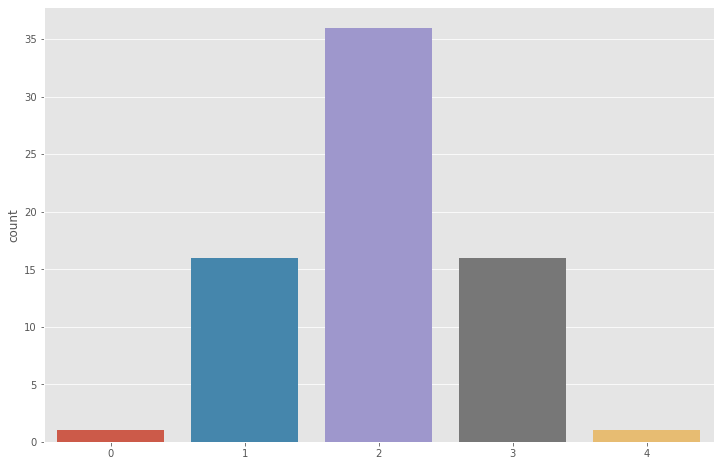

In [65]:
import random
import seaborn as sns

# Pick a random correct answer from the list of 70 to simulate the experiment. To be the 'milkfirst' cups. could have used 1st 4 but just showing random selection.
milkfirst = set(random.choice(poss))

# itertools combinations creates the random sets of 4
# set doesnt have order, doesnt keep count, can't have repeats

# Count the overlap (intersection) between the correct answer, and each of the 70 possiblities.
counts = [len(milkfirst & set(i)) for i in itertools.combinations(cups, 4)]

# give me the size of the overlaps either theres 0 overlap, 1 overlap, 2 overlaps, 3 overlaps, 4 overlaps etc
# Create the plot.(Null distribution)
sns.countplot(x=counts);

# 1 opportunity of 0 overlaps. milkfirst selection has none right.  Exact opposite
# 1 opportunity to get 4 right
# 37 overlap 2 (2 right)
# 15 overlap (1 right or 3 right)
# thus if  allow one cup choice wrong then 20% chance (15/70*100) that they randomly select three correct ones
# based on chance alone
# null hypothesis is true is usually out at the tail (i.e. 5% CI) i.e. theres only 5% or less chance that they could
# have chosen the correct cups randomly
# In this case the null hypothesis (here defined as taster does not know which cups and choice is purely random)
# can be rejected and taster can select the correct cups.

<h3 style="color: #001a79;">Exercise</h3>

<hr style="border-top: 1px solid #001a79;" />

<i style="color: #001a79;">Remember to do these exercises in your own notebook in your assessment repository.</i>

Use <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html" style="color: #ff791e">scipy's version of Fisher's exact test</a> to simulate the Lady Tasting Tea problem.

## new section week 3

---

<h2 style="color: rgb(0, 91, 94);">$t$-Tests</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />


$t$-tests are among the most common statistical tests performed in world.


This notebook focuses on the practicalities of performing $t$-tests in Python.

For information about the $t$-test itself, I recommend reading [Laerd Statistics's Independent t-test using SPSS Statistics](https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php).
$t$-tests are among the most common statistical tests performed in world.

<u>The t test estimates the true difference between two group means using the ratio of the difference in group means over the pooled standard error of both groups.</u>

![alt text for screen readers](http://localhost:8888/files/images/t-test%20formula.png?_xsrf=2%7Cddfa8db4%7C54cd136eb57f3fe394d47cabdf8b0e3b%7C1670523383 "T-test formula")

A larger t value shows that the difference between group means is greater than the pooled standard error, indicating a more significant difference between the groups.

If the groups come from a single population (e.g., measuring before and after an experimental treatment), perform a **paired t test**. This is a within-subjects design.  

If the groups come from two different populations (e.g., two different species, or people from two separate cities), **perform a two-sample t test (a.k.a. independent t test)**. This is a between-subjects design.  

If there is one group being compared against a standard value (e.g., comparing the acidity of a liquid to a neutral pH of 7), **perform a one-sample t test.**  

If you only care whether the two populations are different from one another, **perform a two-tailed t test.**  

If you want to know whether one population mean is greater than or less than the other, **perform a one-tailed t test.**


<h2 style="color: rgb(0, 91, 94);">Packages</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

One of Python's strengths is the quality of numerical packages available.

In [44]:
# Efficient numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Main statistics package.
import scipy.stats as ss

# Alternative statistics package.
import statsmodels.stats.weightstats as stat

# Plotting.
import matplotlib.pyplot as plt

# Fancier plotting.
import seaborn as sns

# Better sized plots.
plt.rcParams['figure.figsize'] = (12, 8)

# Nicer colours and styles for plots.
plt.style.use("ggplot")

<h2 style="color: rgb(0, 91, 94);">Simulated Data</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

We can create fake data sets with specific properties to investigate numerical methods.

#### can play with mean and stddev of both data sets below and re-plot.
#### closer mean and greater stddev makes it more difficult to ascertain same or different populations
#### solution is to run the t-test

In [45]:
# Parameters for two different lists of numbers.
m_a, s_a, m_b, s_b = 1.0, 0.4, 2.0, 0.4
# Sample size.
N = 40

# Create two lists of numbers based on bell-shaped probability curves.
a = np.random.normal(loc=m_a, scale=s_a, size=N)
b = np.random.normal(loc=m_b, scale=s_b, size=N)

# Stick both samples in one data frame.
df = pd.DataFrame({'Category': ['A'] * len(a) + ['B'] * len(b), 'Value': np.hstack([a,b])})

# We can look directly at the list of numbers, but it's not very illuminating.
df

,Category,Value
0,A,0.674549
1,A,1.158304
2,A,0.868336
3,A,0.743740
4,A,1.493782
...,...,...
75,B,1.616803
76,B,1.728069
77,B,2.164378
78,B,2.283594


<h2 style="color: rgb(0, 91, 94);">Visualisation</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

A good plot can quickly show us what the numbers look like.

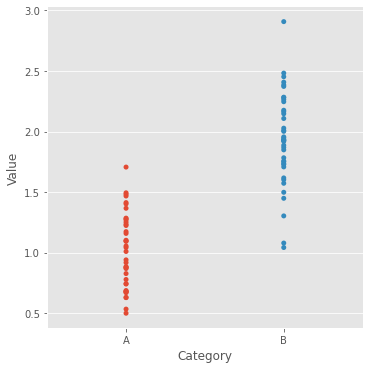

In [46]:
# One type of plot available in seaborn.
sns.catplot(x='Category', y='Value', jitter=False, data=df);

<h2 style="color: rgb(0, 91, 94);">The $t$-Test</h2>


<hr style="border-top: 1px solid rgb(0, 91, 94);" />

Running a t-test in Python is done with a single function call. You can use scipy or statsmodels, amongst others.

In [47]:
# The scipy.stats version.
t_ss, p_ss = ss.ttest_ind(a, b)
print(f"t-value: {t_ss}\tp-value: {p_ss}")
print(f"P_scipy: {p_ss:0.5f}")

t-value: -11.856108881540404	p-value: 3.937801932704443e-19
P_scipy: 0.00000


In [48]:
# The statsmodels version.
t_sm, p_sm, d_sm = stat.ttest_ind(a, b)
print(f"t-value: {t_sm}\tp-value: {p_sm}\tDeg Free: {d_sm}")
print(f"P_statsmodels: {p_sm:0.2f}")

t-value: -11.856108881540406	p-value: 3.937801932704415e-19	Deg Free: 78.0
P_statsmodels: 0.00


In [49]:
# Calculate t statistic "by hand".
# https://en.wikipedia.org/wiki/Test_statistic

#Two-sample pooled t-test, equal variances

# Length of the arrays.
n1 = len(a)
n2 = len(b)

# Means of the samples.
m1 = np.sum(a) / n1
m2 = np.sum(b) / n2

# Sample standard deviations.
s1 = np.sqrt(np.sum((a - m1)**2) / (n1 - 1))
s2 = np.sqrt(np.sum((b - m2)**2) / (n1 - 1))

df = n1 + n2 - 2
sp2 = ((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / df
t = (m1 - m2) / (np.sqrt(sp2) * np.sqrt(1.0/n1 + 1.0/n2))

t

-11.856108881540404

<h2 style="color: rgb(0, 91, 94);">Populations</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

$t$-tests perform calculations on samples from two populations to test whether the populations are likely similar.

In the real world, we only see the samples and we cannot see the populations.

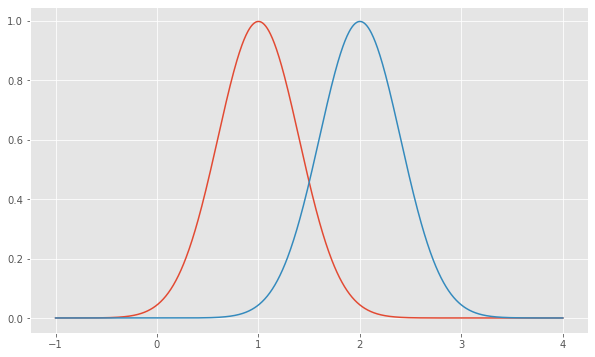

In [50]:
# Let's create a plot with the following x values.
# can reuse the same mean & stdev values for a & b above
# m_a = mean 'a', m_b = mean 'b', 
# s_a = stdev 'a', s_b = stdev 'b', 
# pull x values from -5 to +5 stdev to ensure bell curve pop is reasonably covered
min_x = min(m_a, m_b) - 5.0 * max(s_a, s_b)
max_x = max(m_a, m_b) + 5.0 * max(s_a, s_b)

# create the values of x within the range
x = np.linspace(min_x, max_x, 1000)

# We'll have plots of two different populations on one set of axes.
# These are normal probability density functions (pdf).
# See: https://en.wikipedia.org/wiki/Normal_distribution
y_a = ss.norm.pdf(x, m_a, s_a)
y_b = ss.norm.pdf(x, m_b, s_b)

# Create and show the plot.
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x, y_a)
ax.plot(x, y_b)
plt.show()

<h2 style="color: rgb(0, 91, 94);">Critical Value</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

The critical value is used to make a decision regarding the calculation of the $t$ statistic from the samples.

If the probability, of seeing such a $t$ value given the hypothesis that there is no difference between the means, is low, then data is suggesting that you should reject that hypothesis.  

In this case the means come from different populations.

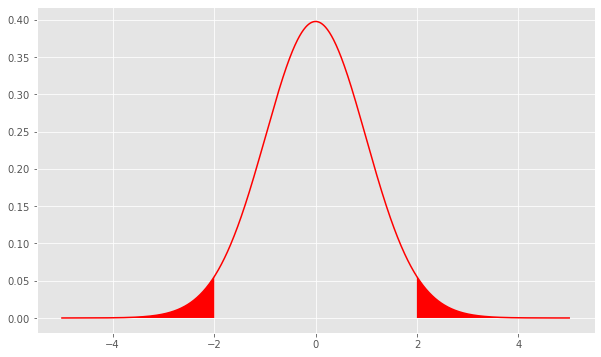

In [51]:
# The critical probability value.
critical = 0.05

# Create the figure.
fig, ax = plt.subplots(figsize=(10,6))

# A range of x-values - these represent the t statistic.
min_x = -5.0
max_x = 5.0
x = np.linspace(min_x, max_x, 1000)

# The probability density function of the t statistic.
# Here we use the degrees of freedom from above.
t = ss.t.pdf(x, d_sm)
# Plot it.
ax.plot(x, t, color='red')

# Get the tails.
tf = pd.DataFrame({'x': x, 't': t})
tcrit = abs(ss.t.ppf(critical / 2.0, d_sm))
tail_one = tf[tf['x'] >= tcrit]
tail_two = tf[tf['x'] <= -tcrit]
# Plot them.
ax.fill_between(tail_one['x'], tail_one['t'], 0, facecolor="red")
ax.fill_between(tail_two['x'], tail_two['t'], 0, facecolor="red")

plt.show()

<h2 style="color: rgb(0, 91, 94);">Type I errors - False Positives</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

In [52]:
# Let's run 10000 t-tests where the population means are equal.
# We should make the wrong decision (reject the hypothesis) (100 * critical) percent of the time.

# The number of trials to run.
trials = 10000
# The number of values in each sample.
N = 100
# Population 1 mean, population 2 mean, standard deviation in both.
mean1, mean2, stddev = 2.0, 2.0, 0.3
# Critical probability value.
critical = 0.05

# Running total of type I errors commited.
rejects = 0

# Loop throguh trials.
for i in range(trials):
    # Generate sample 1.
    sample1 = np.random.normal(loc=mean1, scale=stddev, size=N)
    # Generate sample 2.
    sample2 = np.random.normal(loc=mean2, scale=stddev, size=N)
    # Run the t-test.
    t, p = ss.ttest_ind(sample1, sample2)
    # If p is less than critical, reject.
    if p <= critical:
        rejects = rejects + 1

# Print results.
typei = 100.0 * (rejects / trials)
print(f"{typei:0.2f}%")

# Thus output is the frequency of REJECTING the null hypothesis (based on 0.05 threshold) given as a percentage
# Thus desipte np.random instruced to use same mean to create sample1 & sample 2 datasets.
# ~5% false positives-'significant difference in means' and null hypothesis erroneously rejected

4.64%


<h2 style="color: rgb(0, 91, 94);">Type II errors - False Negatives</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

The chance of a false negative is harder to quantify.

It depends on how close the means are.

In [71]:
# Let's run 10000 t-tests where the population means are NOT equal.
# How often will we not reject the hypothesis?

# The number of trials to run.
trials = 10000
# The number of values in each sample.
N = 100
# Population 1 mean, population 2 mean, standard deviation in both.
mean1, mean2, stddev = 2.0, 2.1, 0.3
# Critical probability value.
critical = 0.05

# Running total of type I errors commited.
notrejects = 0

# Loop throguh trials.
for i in range(trials):
    # Generate sample 1.
    sample1 = np.random.normal(loc=mean1, scale=stddev, size=N)
    # Generate sample 2.
    sample2 = np.random.normal(loc=mean2, scale=stddev, size=N)
    # Run the t-test.
    t, p = ss.ttest_ind(sample1, sample2)
    # If p is greater than critical, do not reject.
    if p > critical:
        notrejects = notrejects + 1

# Print results.
typeii = 100.0 * (notrejects / trials)
print(f"{typeii:0.2f}%")

# Thus output is the frequency of accepting of the null hypothesis (based on 0.05 threshold) given as a percentage
# Thus approx 1 in 3 t-tests accepts the null hypothesis (means from same population) 
# desipte np.random instruced to use DIFFERENT mean (2.0 & 2.1) to create sample1 & sample 2 datasets.
# ~35% false positives-'no significant difference in means'. Null hypothesis erroneously accepted
# Note: reduces to 0.3% if mean (2.0 & 2.2) used

35.56%


<h2 style="color: rgb(0, 91, 94);">Paired Samples</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

Here we try a slightly different $t$ test - one based on repeated measures.

*References for this section:*

[Vincent Arel-Bundock's R datasets list](https://vincentarelbundock.github.io/Rdatasets/articles/data.html)

[t-test: Comparing Group Means](https://uc-r.github.io/t_test)

In [54]:
dfsleep = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/sleep.csv")
dfsleep

,Unnamed: 0,extra,group,ID
0,1,0.7,1,1
1,2,-1.6,1,2
2,3,-0.2,1,3
3,4,-1.2,1,4
4,5,-0.1,1,5
5,6,3.4,1,6
6,7,3.7,1,7
7,8,0.8,1,8
8,9,0.0,1,9
9,10,2.0,1,10


In [55]:
# Extract the first sample from the data set.
drugA = dfsleep[dfsleep["group"] == 1]
drugA = drugA.sort_values("ID")
drugA = drugA["extra"].to_numpy()
drugA

array([ 0.7, -1.6, -0.2, -1.2, -0.1,  3.4,  3.7,  0.8,  0. ,  2. ])

In [56]:
# Extract the second sample from the data set.
drugB = dfsleep[dfsleep["group"] == 2]
drugB = drugB.sort_values("ID")
drugB = drugB["extra"].to_numpy()
drugB

array([ 1.9,  0.8,  1.1,  0.1, -0.1,  4.4,  5.5,  1.6,  4.6,  3.4])

In [57]:
# Run a paired samples t-test.
ss.ttest_rel(drugA, drugB)

Ttest_relResult(statistic=-4.062127683382037, pvalue=0.00283289019738427)

In [58]:
# In one way, this is equivalent to a one sample t-test.
ss.ttest_1samp(drugB - drugA, 0)

Ttest_1sampResult(statistic=4.062127683382037, pvalue=0.00283289019738427)

In [59]:
# That's how statsmodels suggests you do the test.
stat.DescrStatsW(drugB - drugA).ttest_mean(0)

(4.062127683382037, 0.00283289019738427, 9.0)

<h2 style="color: rgb(0, 91, 94);">Problems with multiple $t$-tests</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

Suppose we want to compare three groups. The null hypothesis is that the population means are all equal. Can three $t$ tests be run in parallel?

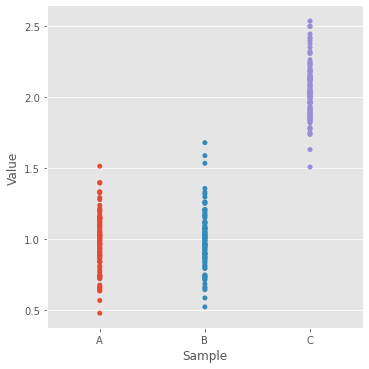

In [60]:
# Size of each sample.
N = 100

# Create three samples.
sampA = np.random.normal(1.0, 0.2, N)
sampB = np.random.normal(1.0, 0.2, N)
sampC = np.random.normal(2.0, 0.2, N)

# Put samples in a single data frame.
sample = ['A'] * N + ['B'] * N + ['C'] * N
values = np.hstack([sampA, sampB, sampC])
dfsamps = pd.DataFrame({'Sample': sample, 'Value': values})

# Visualise samples.
sns.catplot(x='Sample', y='Value', jitter=False, data=dfsamps);

In [61]:
# t-Tests - one for each pair.
t_AB, p_AB = ss.ttest_ind(sampA, sampB)
t_AC, p_AC = ss.ttest_ind(sampA, sampC)
t_BC, p_BC = ss.ttest_ind(sampB, sampC)

print(f"p_AB: {p_AB:.2f}\tp_AC: {p_AC:.2f}\tp_BC: {p_BC:.2f}")

p_AB: 0.58	p_AC: 0.00	p_BC: 0.00


In [62]:
# Let's run 10000 t-tests where the population means are equal.
# We should make the wrong decision (reject the hypothesis) (100 * critical) percent of the time.
# We expect to incorrectly reject the null hypothesis 5% of the time.

# The number of trials to run.
trials = 10000
# The number of values in each sample.
N = 100
# Population 1 mean, population 2 mean, population 3 mean, standard deviation in both.
mean1, mean2, mean3, stddev = 2.0, 2.0, 2.0, 0.3
# Critical probability value.
critical = 0.05

# Running total of type I errors commited.
rejects = 0

# Loop throguh trials.
for i in range(trials):
    # Generate sample 1.
    sample1 = np.random.normal(loc=mean1, scale=stddev, size=N)
    # Generate sample 2.
    sample2 = np.random.normal(loc=mean2, scale=stddev, size=N)
    # Generate sample 3.
    sample3 = np.random.normal(loc=mean3, scale=stddev, size=N)
    # Run the t-tests.
    t1, p1 = ss.ttest_ind(sample1, sample2)
    t2, p2 = ss.ttest_ind(sample1, sample3)
    t3, p3 = ss.ttest_ind(sample2, sample3)
    # If any is less than critical, reject.
    if p1 <= critical or p2 <= critical or p3 <= critical:
        rejects = rejects + 1

# Print results.
typei = 100.0 * (rejects / trials)
print(f"{typei:0.2f}%")

# Thus output is the frequency of REJECTING the null hypothesis (based on 0.05 threshold) given as a percentage
# Thus desipte np.random instruced to use same mean to create sample1 & sample 2 & sample 3 datasets.
# ~12% of times false positives-'significant difference in means' and null hypothesis erroneously rejected

12.09%


<h2 style="color: rgb(0, 91, 94);">Analaysis of Variance (ANOVA)</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

ANOVA can be used to avoid a higher Type I error rate.


In [63]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html
F, P = ss.f_oneway(sampA, sampB, sampC)
print(f"F:{F:.2f} P:{P:.2f}")

F:932.61 P:0.00


In [64]:
# Let's run 10000 ANOVAs where the population means are equal.
# We should make the wrong decision (reject the hypothesis) (100 * critical) percent of the time.
# We expect to incorrectly reject the null hypothesis 5% of the time.

# The number of trials to run.
trials = 10000
# The number of values in each sample.
N = 100
# Population 1 mean, population 2 mean, population 3 mean, standard deviation in both.
mean1, mean2, mean3, stddev = 2.0, 2.0, 2.0, 0.3
# Critical probability value.
critical = 0.05

# Running total of type I errors commited.
rejects = 0

# Loop throguh trials.
for i in range(trials):
    # Generate sample 1.
    sample1 = np.random.normal(loc=mean1, scale=stddev, size=N)
    # Generate sample 2.
    sample2 = np.random.normal(loc=mean2, scale=stddev, size=N)
    # Generate sample 3.
    sample3 = np.random.normal(loc=mean3, scale=stddev, size=N)
    # Run the test.
    F, p = ss.f_oneway(sample1, sample2, sample3)
    # If any is less than critical, reject.
    if p <= critical:
        rejects = rejects + 1

# Print results.
typei = 100.0 * (rejects / trials)
print(f"{typei:0.2f}%")

4.72%


<h3 style="color: #001a79;">Exercise</h3>

<hr style="border-top: 1px solid #001a79;" />

<i style="color: #001a79;">Remember to do these exercises in your own notebook in your assessment repository.</i>

Take the code from the <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html" style="color: #ff791e">Examples section of the scipy stats documentation for independent samples t-tests</a>, add it to your own notebook and add explain how it works using MarkDown cells and code comments. Improve it in any way you think it could be improved.

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

<h2 style="color: rgb(0, 91, 94);">End</h2>